# Hamburg Monuments Analysis

In [251]:
# Libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings('ignore')

In [252]:
# Load data from xml

data = pd.read_xml('DenkmallisteHamburg.xml')
data

,ID,Belegenheit,Adressen,Stadtteil,Bezirk,Typ,Entwurf,Datierung,Bezeichnung,Ensembles,DLNummer_Alt,Art,XCenter_EPSG25832,YCenter_EPSG25832
0,11752,Lutterothstraße 98,Lutterothstraße 98,Eimsbüttel,Eimsbüttel,Pastorat,"Distel & Grubitz ( Distel, Hermann/ Grubitz, A...",1912,Pastorat der ehem. Stephanuskirche,"Eidelstedter Weg 91/ 105, Lutterothstraße 76, ...",1738,Objekt,562489.2425,5.937415e+06
1,11753,Kaistraße o.Nr.,"Kaistraße o.Nr., Max-Brauer-Allee o.Nr., Palma...","Altona-Altstadt, Altona-Nord",Altona,Tunnel,None,1874; 1893 (Verlängerung),"Hafenbahn Altona, Hafenbahntunnel (""Schellfisc...","Hafenbahn Altona, Ensemble aus Relikten der Ha...",None,Objekt,561915.2675,5.933740e+06
2,11753,Max-Brauer-Allee o.Nr.,"Kaistraße o.Nr., Max-Brauer-Allee o.Nr., Palma...","Altona-Altstadt, Altona-Nord",Altona,Tunnel,None,1874; 1893 (Verlängerung),"Hafenbahn Altona, Hafenbahntunnel (""Schellfisc...","Hafenbahn Altona, Ensemble aus Relikten der Ha...",None,Objekt,561915.2675,5.933740e+06
3,11753,Palmaille o.Nr.,"Kaistraße o.Nr., Max-Brauer-Allee o.Nr., Palma...","Altona-Altstadt, Altona-Nord",Altona,Tunnel,None,1874; 1893 (Verlängerung),"Hafenbahn Altona, Hafenbahntunnel (""Schellfisc...","Hafenbahn Altona, Ensemble aus Relikten der Ha...",None,Objekt,561915.2675,5.933740e+06
4,11753,Paul-Nevermann-Platz o.Nr.,"Kaistraße o.Nr., Max-Brauer-Allee o.Nr., Palma...","Altona-Altstadt, Altona-Nord",Altona,Tunnel,None,1874; 1893 (Verlängerung),"Hafenbahn Altona, Hafenbahntunnel (""Schellfisc...","Hafenbahn Altona, Ensemble aus Relikten der Ha...",None,Objekt,561915.2675,5.933740e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22529,54595,Gottorpstraße 25,Gottorpstraße 25,Othmarschen,Altona,Einfamilienhaus,"Graaf, Heinz (1935); Graaf, Heinz (1952); Köhn...",1935; 1952; 1977,Wohn- und Atelierhaus,"Gottorpstraße 25, Wohn- und Atelierhaus",None,Objekt,559005.4760,5.934816e+06
22530,54608,Grindelhof 52,Grindelhof 52,Rotherbaum,Eimsbüttel,Tankstelle,"Rübcke, Hans Christoph",1957 - 1958,None,None,None,Objekt,565191.7045,5.936076e+06
22531,54861,Meerweinstraße o.Nr.,Meerweinstraße o.Nr.,Winterhude,Hamburg-Nord,Spielplatz,None,None,Spielplatz Meerweinstraße,"Meerweinstraße 26, 26a, 28, 28a; Schulanlage e...",None,Objekt,567916.2510,5.938044e+06
22532,54867,Jürgensallee 58,"Jürgensallee 58, 60",Nienstedten,Altona,Einfriedung,None,None,Einfriedung,Einfriedung\n \nVilla Nr. 60 mit Einf...,None,Objekt,556779.6980,5.934643e+06


In [253]:
# drop duplicate indexes
data = data[~data.ID.duplicated(keep='first')]

# set the index to the column 'id'
data.set_index('ID', inplace=True, verify_integrity=True)
# drop multi-index header
# data.droplevel(0, axis=1)

# clean the data
cols = ['Adressen', 'Stadtteil', 'Bezirk', 'Typ', 'Datierung', 'XCenter_EPSG25832', 'YCenter_EPSG25832']
data = data[cols].dropna()
data.columns = ['adresse', 'stadtteil', 'bezirk', 'typ', 'jahr', 'x', 'y']

data

,adresse,stadtteil,bezirk,typ,jahr,x,y
ID,,,,,,,
11752,Lutterothstraße 98,Eimsbüttel,Eimsbüttel,Pastorat,1912,562489.2425,5.937415e+06
11753,"Kaistraße o.Nr., Max-Brauer-Allee o.Nr., Palma...","Altona-Altstadt, Altona-Nord",Altona,Tunnel,1874; 1893 (Verlängerung),561915.2675,5.933740e+06
11758,Kielkoppelstraße 51,Rahlstedt,Wandsbek,Gemeindehaus,1968 / 1969,578101.5780,5.938478e+06
11759,Zum Gutspark 2,Farmsen-Berne,Wandsbek,Wohnen,1926,575103.1880,5.942505e+06
11760,Falkensteiner Ufer 42,Blankenese,Altona,Wohnen,1859,551866.3585,5.935037e+06
...,...,...,...,...,...,...,...
54568,"Herbertstraße o.Nr., am westlichen Ende der He...",St. Pauli,Hamburg-Mitte,Tor; Torpfosten,1933,563692.7890,5.933668e+06
54569,"Herbertstraße o.Nr., am östlichen Ende der Her...",St. Pauli,Hamburg-Mitte,Tor; Torpfosten,1933,563768.9605,5.933675e+06
54588,Dritte Meile 1,Neugraben-Fischbek,Harburg,Turm,1962 - 1964,554978.6175,5.925282e+06


In [254]:
#get the year from multiple years
data['jahr'] = data['jahr'].str.extract(r'(\d{4})').dropna().astype(int)
data.jahr.value_counts().sort_values(ascending=False)


jahr
1935.0    637
1919.0    378
1953.0    318
1905.0    316
1926.0    299
         ... 
1607.0      1
1263.0      1
1635.0      1
1728.0      1
1994.0      1
Name: count, Length: 360, dtype: int64

In [255]:
# take only first bezirk, before the comma
data['bezirk'] = data['bezirk'].str.split(',').str[0]

## Analysis

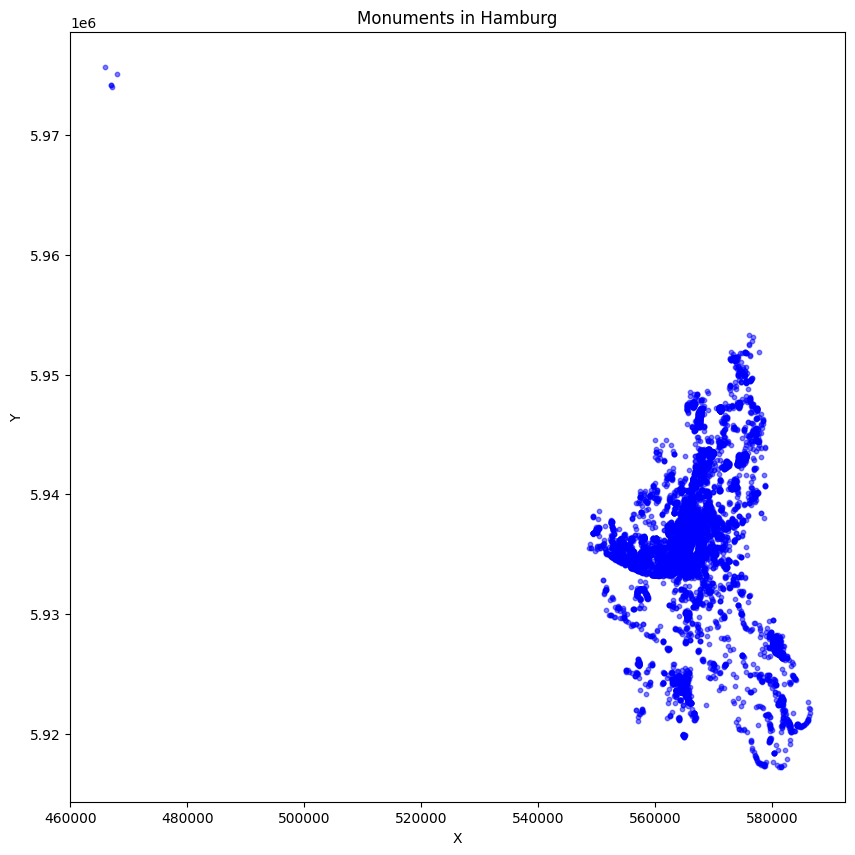

In [256]:
# visualizing the locations of the monuments
def plot_map(data):
    plt.figure(figsize=(10, 10))
    plt.scatter(data.x, data.y, s=10, c='b', alpha=0.5)
    plt.title('Monuments in Hamburg')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

plot_map(data)

As we see the monuments in Neuwerk are skewing our map, we will remove them from the analysis.

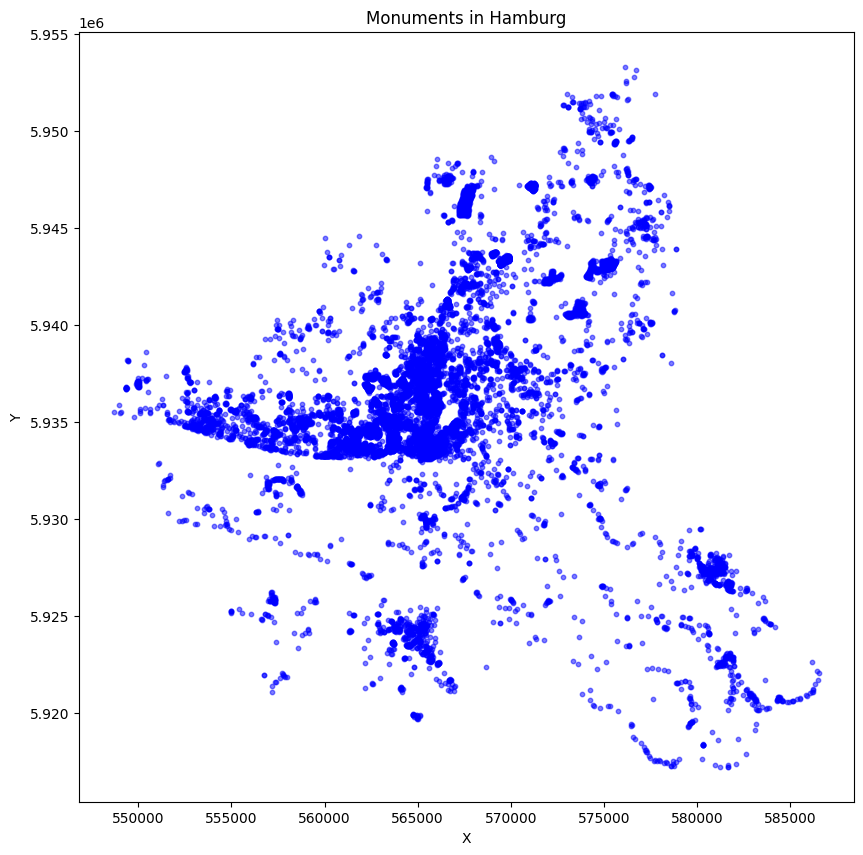

In [257]:
data = data[data.x > 520000]
plot_map(data)

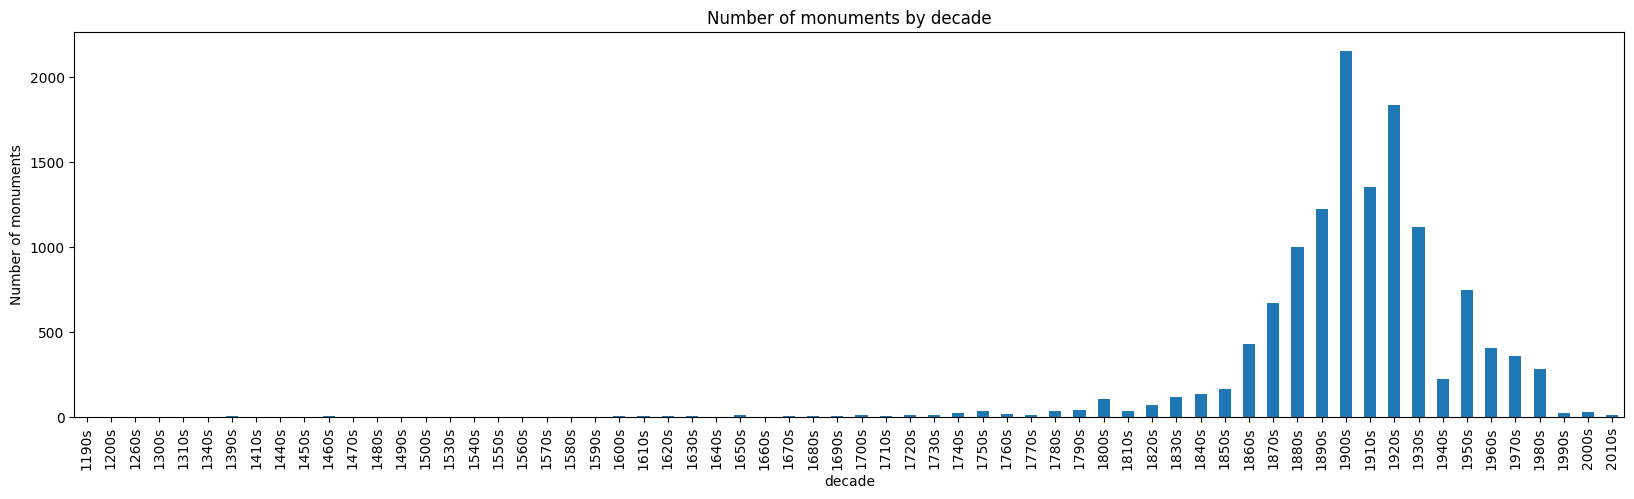

In [258]:
# aggregate by decades
data['decade'] = (data.jahr // 10 * 10).dropna().astype(int).astype(str) + 's'

def plot_year(data, col, orientation='vertical'):
    plt.figure(figsize=(20, 5))
    data[col].value_counts().sort_index().plot(kind='bar')
    plt.title('Number of monuments by ' + col)
    plt.xlabel(col)
    plt.ylabel('Number of monuments')
    if orientation == 'horizontal':
        plt.xticks(rotation=0)
    plt.show()

plot_year(data, 'decade')

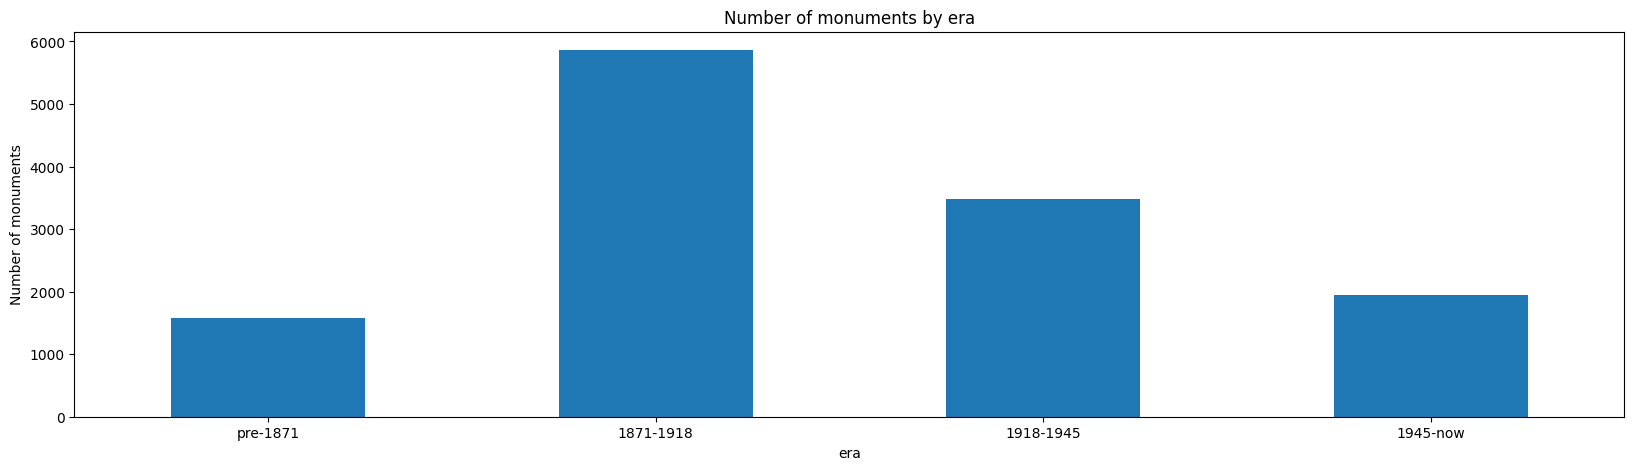

In [259]:
data['era'] = pd.cut(data.jahr, bins=[0, 1871, 1918, 1945, 2020], labels=['pre-1871', '1871-1918', '1918-1945', '1945-now'])

plot_year(data, 'era', orientation='horizontal')

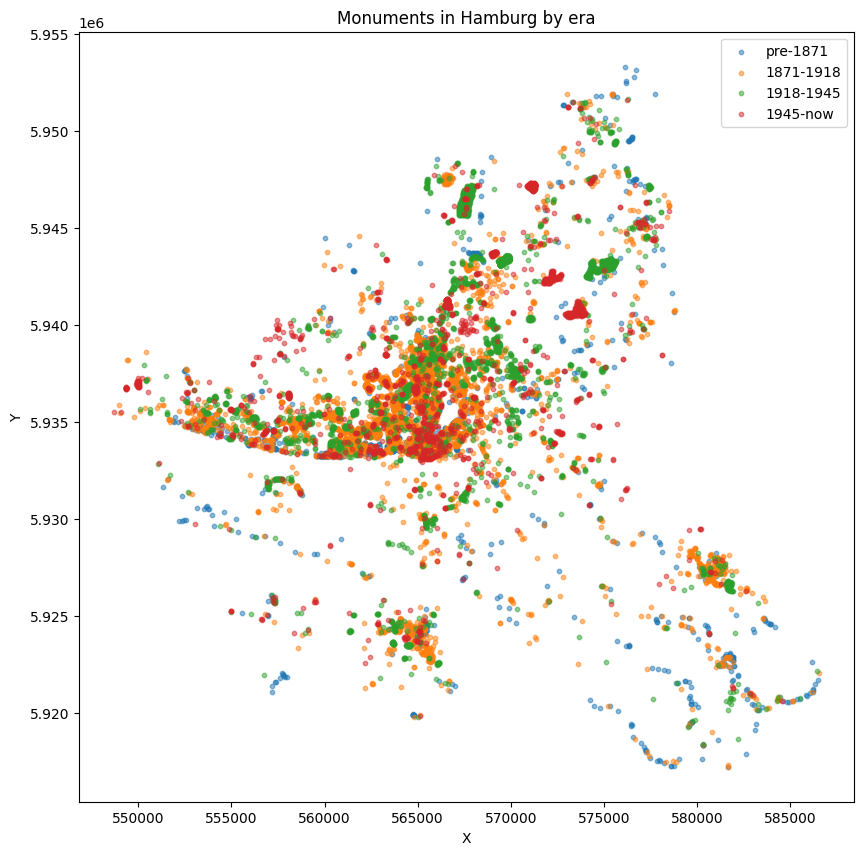

In [260]:
def plot_map_by(data, col):
    plt.figure(figsize=(10, 10))
    for name, group in data.groupby(col):
        plt.scatter(group.x, group.y, s=10, alpha=0.5, label=name)
    plt.title('Monuments in Hamburg by ' + col)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

plot_map_by(data, 'era')

## Geographical Classification

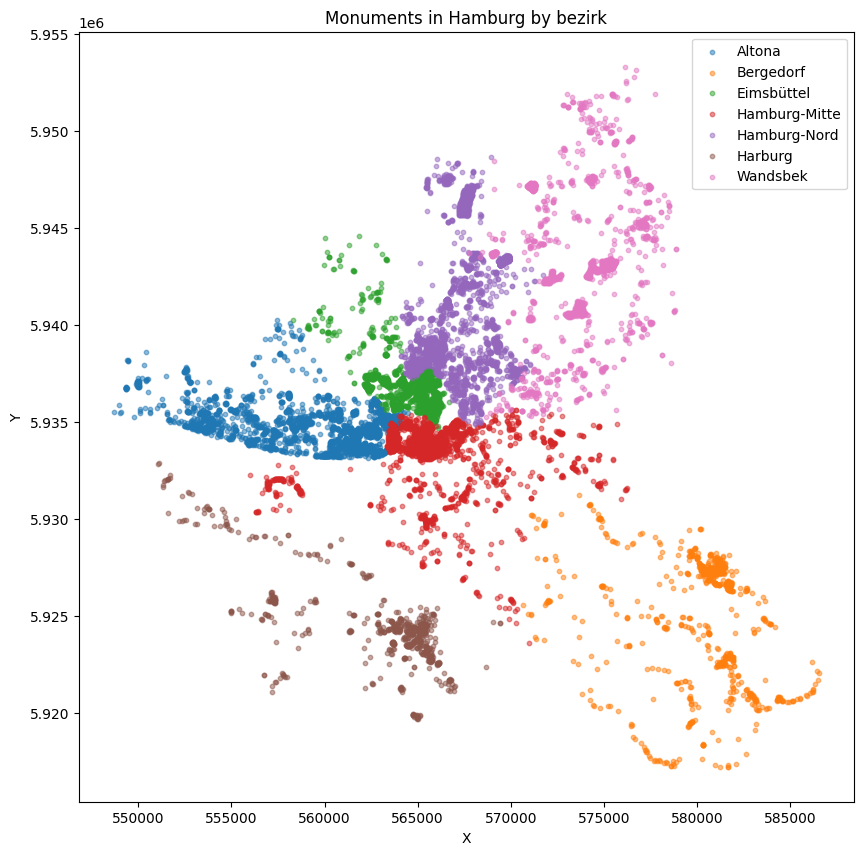

In [261]:
plot_map_by(data, 'bezirk')

We have 7 districts in Hamburg, and we will attempt to classify the monuments as close to these districts as possible.

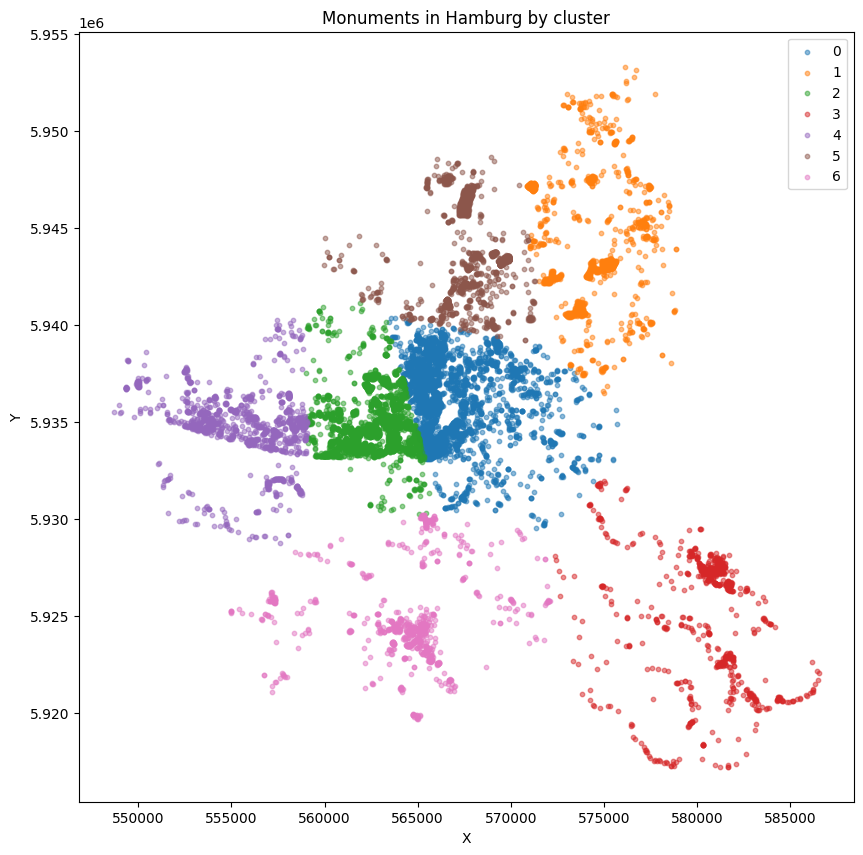

In [262]:
# KMeans clustering
def kmeans(data, n_clusters, seed=42):
    kmeans = KMeans(n_clusters=n_clusters, random_state=seed)
    kmeans.fit(data[['x', 'y']])
    data['cluster'] = kmeans.predict(data[['x', 'y']])

    plot_map_by(data, 'cluster')

kmeans(data, 7)

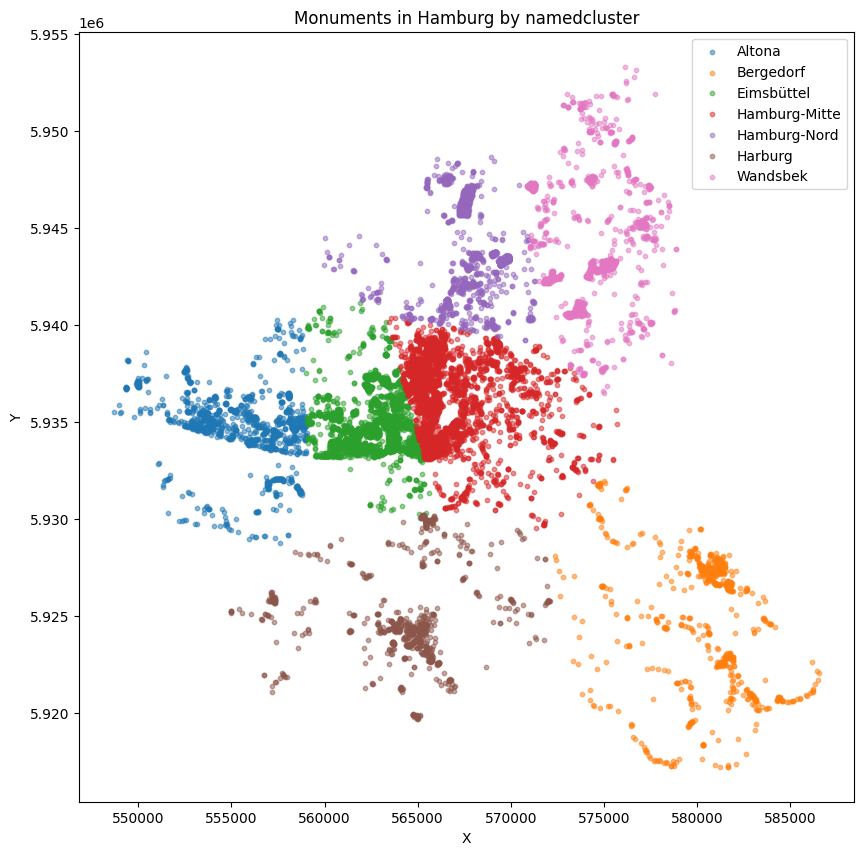

In [263]:
# name the clusters with actual districts names
data['namedcluster'] = data['cluster'].map({0: 'Hamburg-Mitte', 1: 'Wandsbek', 2: 'Eimsbüttel', 3: 'Bergedorf', 4: 'Altona', 5: 'Hamburg-Nord', 6: 'Harburg'})

plot_map_by(data, 'namedcluster')

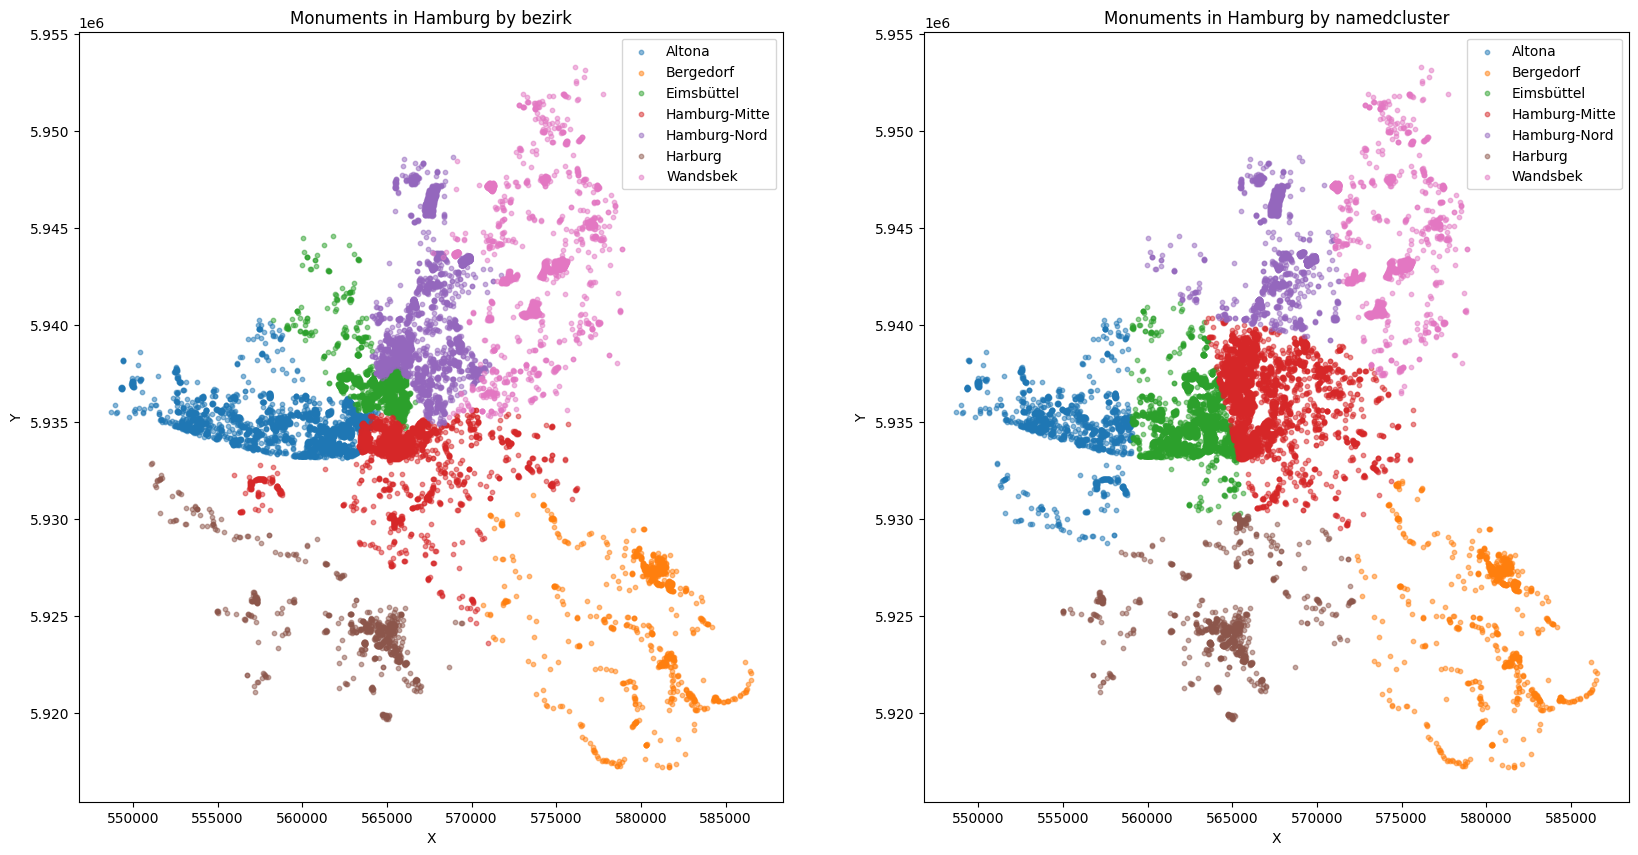

In [265]:
# put both plots side by side
def plot_map_by(data, col, ax):
    for name, group in data.groupby(col):
        ax.scatter(group.x, group.y, s=10, alpha=0.5, label=name)
    ax.set_title('Monuments in Hamburg by ' + col)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()

fig, axs = plt.subplots(1, 2, figsize=(20, 10))
plot_map_by(data, 'bezirk', ax=axs[0])
plot_map_by(data, 'namedcluster', ax=axs[1])
plt.show()

In [ ]:
# calculate the accuracy of the clustering

data['accuracy'] = data['bezirk'] == data['namedcluster']
accuracy = data['accuracy'].sum() / data['accuracy'].count()

print('Accuracy:', round(accuracy*100,2))

Accuracy: 56.89 %


In [271]:
# calculate accuracy by district
dist_accuracy = round(data.groupby('bezirk')['accuracy'].sum() / data.groupby('bezirk')['accuracy'].count() *100,2)
dist_accuracy.sort_values(ascending=False)

bezirk
Bergedorf        95.93
Harburg          92.08
Wandsbek         82.84
Hamburg-Mitte    56.70
Hamburg-Nord     54.38
Eimsbüttel       42.24
Altona           35.22
Name: accuracy, dtype: float64